# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Khoirul Hafidh Purwaraharjo
- **Email:** m200b4ky2213@bangkit.academy
- **ID Dicoding:** m200b4ky2213

## IMPORT PACKAGE/LIBRARY

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import warnings
from scipy.stats import linregress

## DATA WRANGLING

### GATHERING DATA

In [2]:
# Memanggil data yang akan digunakan
# Data 1 (Data Hour)
file_data_hour = 'https://drive.google.com/uc?id=1wkscND280FML8nhjNEBD6fVz23Qf-k_1&export=download'

# Data 2 (Data Day)
file_data_day = 'https://drive.google.com/uc?id=1N67xh3SopmzNVI0An74yCLORV93TiS1s&export=download'



### ASSESSING DATA

####ASSESSING DATA 1 (DATA HOUR)

In [3]:
# Membaca data 1 (data hour)
data_hour = pd.read_csv(file_data_hour)

# Menampilkan data
print("5 baris pertama dataset hour:")
print(data_hour.head())


5 baris pertama dataset hour:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [4]:
# Memeriksa tipe data
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


####ASSESSING DATA 2 (DATA DAY)

In [5]:
# Membaca data 2 (data day)
data_day = pd.read_csv(file_data_day)

# Menampilkan data
print("5 baris pertama dataset day:")
print(data_day.head())


5 baris pertama dataset day:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [6]:
# Memeriksa tipe data
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### CLEANING DATA

In [7]:
# Melakukan pengecekan data
# Apakah terdapat nilai data yang hilang (missing value)
print("Jumlah nilai data yang hilang (missing value) dalam dataset hour:")
print(data_hour.isnull().sum())

print("\nJumlah nilai data yang hilang (missing value) dalam dataset day:")
print(data_day.isnull().sum())

Jumlah nilai data yang hilang (missing value) dalam dataset hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah nilai data yang hilang (missing value) dalam dataset day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
# Memeriksa duplikasi data
print("Jumlah data duplikasi")
print("Data 1 (Dataset Hour) = ", data_hour.duplicated().sum())
print("Data 2 (Dataset Day) = ", data_day.duplicated().sum())

Jumlah data duplikasi
Data 1 (Dataset Hour) =  0
Data 2 (Dataset Day) =  0


Dari pengecekan data diatas, dapat disimpulkan bahwa data telah bersih (tidak ada kejanggalan dalam kedua file dataset)

## EXPLANATORY DATA ANALYSIS (EDA)

### Permasalahan 1
#### Bagaimana pola trend dari grafik penyewaan sepeda Washington D.C., USA pada tahun 2011 hingga 2012
### Permasalahan 2
#### Bagaimana faktor musiman dan kondisi cuaca mempengaruhi jumlah penyewaan sepeda

## VISUALIZATION & EXPLANATORY ANALYSIS

### Permasalahan 1: Bagaimana pola trend dari grafik penyewaan sepeda Washington D.C., USA pada tahun 2011 hingga 2012

#### Penggambaran Grafik Jumlah Penyewaan Sepeda Harian dengan Batas Musiman

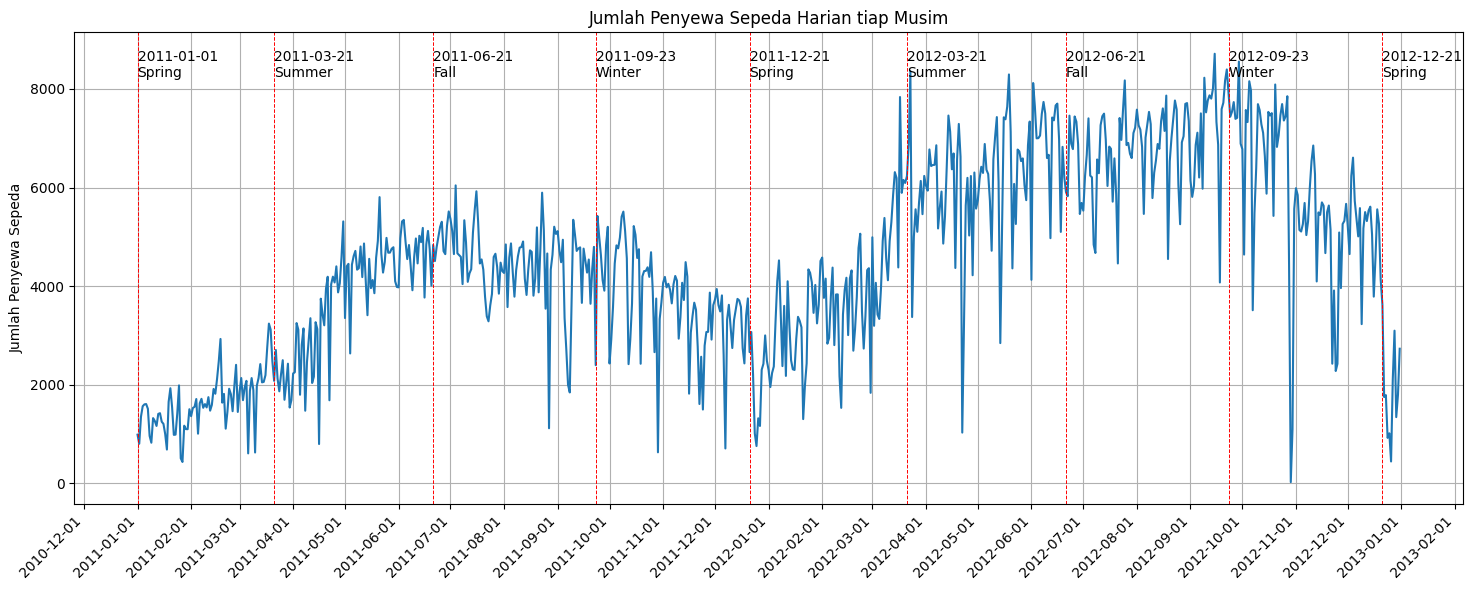

In [9]:
# Mengubah 'dteday' menjadi sebuah objek dalam kolom
data_day['dteday'] = pd.to_datetime(data_day['dteday'])

# Inisiasi plot
fig, ax = plt.subplots(figsize=(15, 6))

# Membuat plot dengan sumbu-x berisi tanggal dan sumbu-y berisi jumlah penyewaan sepeda
ax.plot(data_day['dteday'], data_day['cnt'])
ax.grid(True)
ax.set_ylabel('Jumlah Penyewa Sepeda')
# Mengatur agar hanya tanggal 1 tiap bulan yang muncul pada keterangan sumbu-x
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right')

# Membuat Batasan hari tiap musim
season_changes = [data_day['dteday'].iloc[0]]
for i in range(1, len(data_day)):
    if data_day['season'][i] != data_day['season'][i - 1]:
        season_changes.append(data_day['dteday'][i])

# Garis Pemisah antar musim dengan keterangan kapan tanggal pergantian musim apa yang akan datang
for dteday in season_changes:
    ax.axvline(x=dteday, color='red', linestyle='--', linewidth=0.7)
    season_num = data_day.loc[data_day['dteday'] == dteday, 'season'].iloc[0]
    season_name = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}.get(season_num)
    ax.text(dteday, ax.get_ylim()[1] * 0.9, f"{dteday.strftime('%Y-%m-%d')} \n{season_name}")

# Membuat plot
plt.title('Jumlah Penyewa Sepeda Harian tiap Musim')
plt.tight_layout()
plt.show()


#### Interpretasi Hasil

Dari grafik diatas dapat terlihat bahwa trend penyewaan sepeda mengalami fluktuatif pada tiap musimnya. Terjadi peningkatan trend pada musim semi (spring), trend cenderung stabil pada (panas) summer dan musim gugur (fall), lalu terjadi penurunan trend pada musim dingin (winter).

### Permasalahan 2: Bagaimana faktor musiman dan kondisi cuaca mempengaruhi jumlah penyewaan sepeda

#### Parameter Statistik Data

In [10]:
# Parameter Statistik Data
print("Parameter Statistik Data")

print("Data 1 (Dataset Hour)")
print(data_hour.describe())

print("\nData 2 (Dataset Day)")
print(data_day.describe())

Parameter Statistik Data
Data 1 (Dataset Hour)
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165   

#### Interpretasi Hasil Parameter Statistik

Dari analisis di atas, bisa dilihat bahwa terdapat fluktuasi yang signifikan dalam jumlah penyewa sepeda baik dalam skala hari maupun jam. Beberapa faktor seperti cuaca (suhu, kelembapan, kecepatan angin) dapat berpengaruh terhadap jumlah penyewa, yang dapat menjadi area untuk analisis lebih lanjut.

Selanjutnya, akan dilakukan analisis mengenai bagaimana pengaruh musim dan cuaca terhadap jumlah penyewaan sepeda.

#### Analisis Pengaruh Musim dan Cuaca Terhadap Jumlah Penyewaan Sepeda

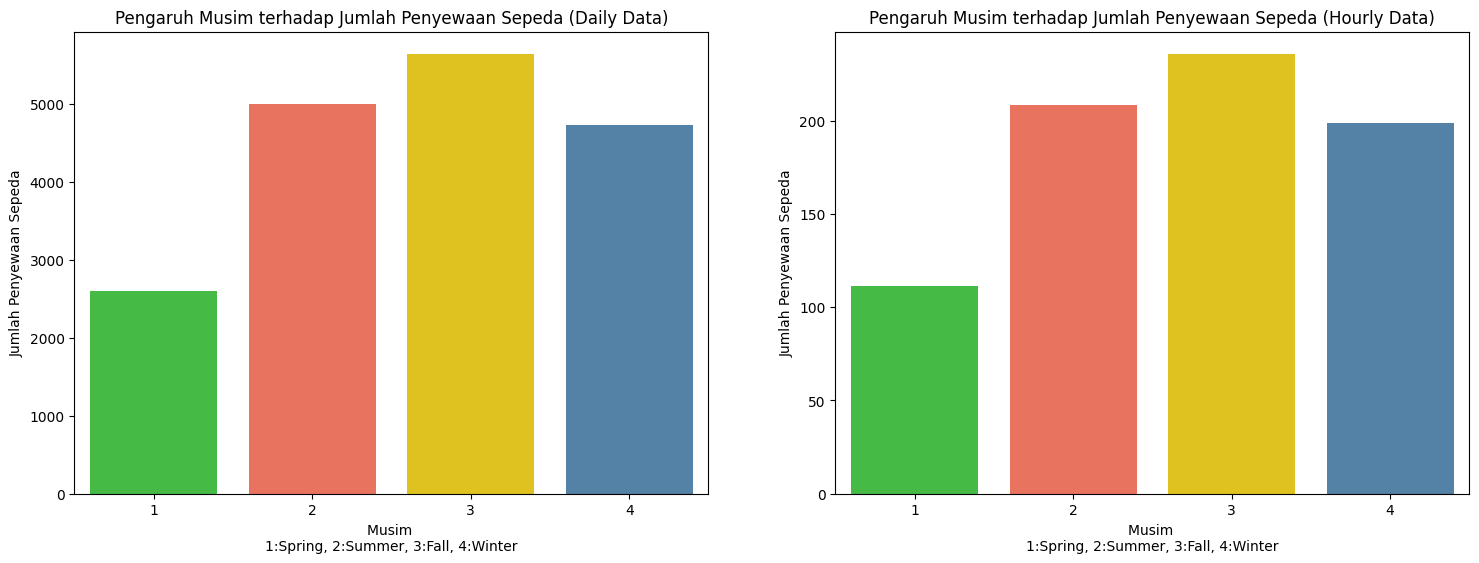

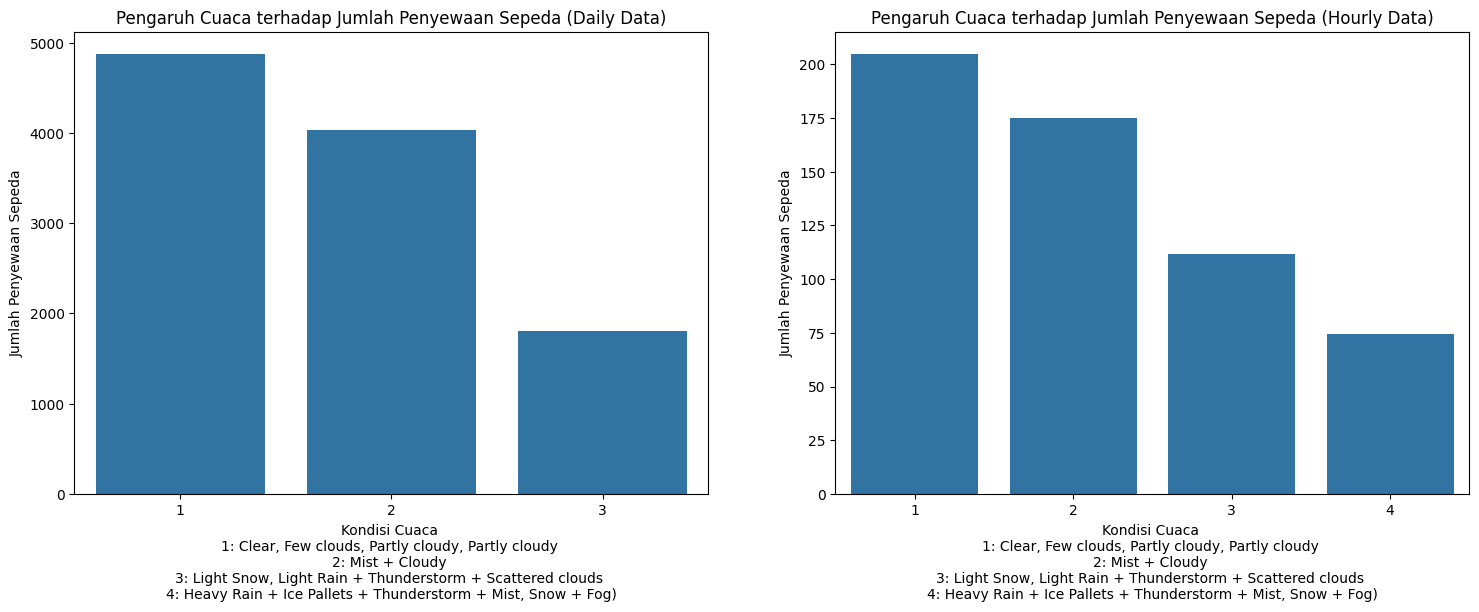

In [11]:
warnings.filterwarnings("ignore")

# Analisis pengaruh musim terhadap jumlah penyewaan sepeda
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
col = ['#32CD32','#FF6347','#FFD700','#4682B4']
sns.barplot(x='season', y='cnt', data=data_day, ci = None, palette=col)
plt.title('Pengaruh Musim terhadap Jumlah Penyewaan Sepeda (Daily Data)')
plt.xlabel('Musim \n1:Spring, 2:Summer, 3:Fall, 4:Winter')
plt.ylabel('Jumlah Penyewaan Sepeda')

plt.subplot(1, 2, 2)
col = ['#32CD32','#FF6347','#FFD700','#4682B4']
sns.barplot(x='season', y='cnt', data=data_hour, ci = None, palette=col)
plt.title('Pengaruh Musim terhadap Jumlah Penyewaan Sepeda (Hourly Data)')
plt.xlabel('Musim \n1:Spring, 2:Summer, 3:Fall, 4:Winter')
plt.ylabel('Jumlah Penyewaan Sepeda')

plt.show()

# Analisis pengaruh cuaca terhadap jumlah penyewaan sepeda
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='weathersit', y='cnt', data=data_day, ci = None)
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda (Daily Data)')
plt.xlabel('Kondisi Cuaca \n1: Clear, Few clouds, Partly cloudy, Partly cloudy \n2: Mist + Cloudy \n3: Light Snow, Light Rain + Thunderstorm + Scattered clouds \n4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)')
plt.ylabel('Jumlah Penyewaan Sepeda')

plt.subplot(1, 2, 2)
sns.barplot(x='weathersit', y='cnt', data=data_hour, ci = None)
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda (Hourly Data)')
plt.xlabel('Kondisi Cuaca \n1: Clear, Few clouds, Partly cloudy, Partly cloudy \n2: Mist + Cloudy \n3: Light Snow, Light Rain + Thunderstorm + Scattered clouds \n4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)')
plt.ylabel('Jumlah Penyewaan Sepeda')

plt.show()

#### Interpretasi Hasil Barplot

Berdasarkan barplot diatas, terlihat bahwa
- Musim gugur (Fall) memiliki jumlah penyewaan sepeda yang cenderung lebih tinggi dibandingkan musim lainnya.
- Cuaca yang cerah (kondisi 1) memiliki jumlah penyewaan sepeda yang paling tinggi, sedangkan cuaca buruk (kondisi 3 dan 4) memiliki jumlah penyewaan sepeda yang paling rendah.

Hal ini menunjukkan bahwa musim dan cuaca memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda.

Untuk mendukung pernyataan diatas, akan dilakukan perhitungan korelasi antara variabel penyewa sepeda (cnt) dengan variabel bebas lainnya (temp, atemp, hum, windspeed) pada data day.

#### Korelasi Antara Variabel Penyewa Sepeda (cnt) dengan Variabel Bebas Lainnya (temp, atemp, hum, windspeed) Menggunakan Metode Korelasi Pearson dan Korelasi Spearman

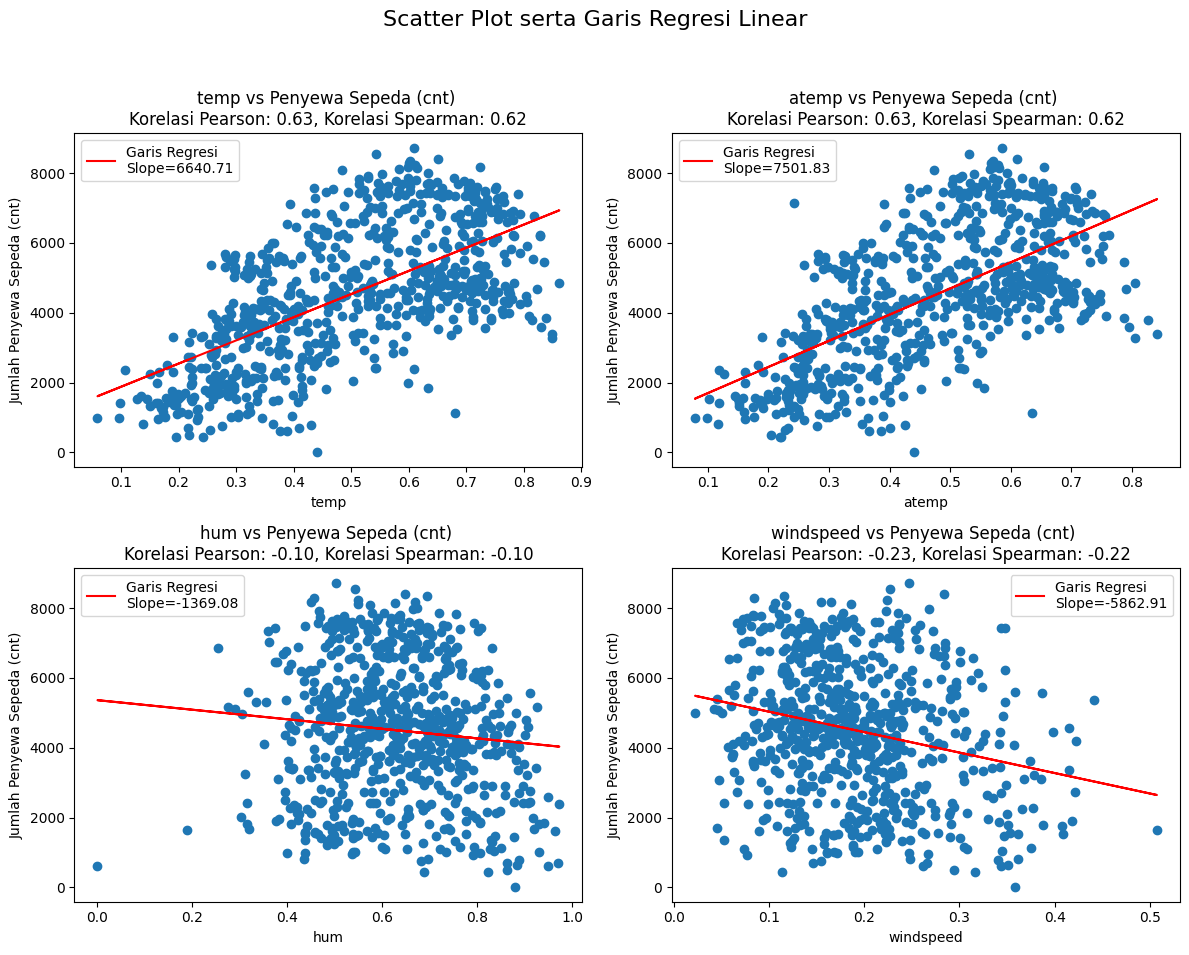

In [12]:
# Korelasi Pearson
correlation_pearson = data_day[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].corr(method='pearson')
# Korelasi Spearman
correlation_spearman = data_day[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].corr(method='spearman')

# Scatterplot dengan Korelasi Pearson dan Garis Regresi Linear
plt.figure(figsize=(12, 10))

plt.suptitle('Scatter Plot serta Garis Regresi Linear', fontsize=16)
for i, col in enumerate(['temp', 'atemp', 'hum', 'windspeed']):
    plt.subplot(2, 2, i+1)

    # Scatter plot
    plt.scatter(data_day[col], data_day['cnt'])

    # Menghitung regresi linear
    slope, intercept, r_value, p_value, std_err = linregress(data_day[col], data_day['cnt'])

    # Membuat garis regresi
    x_vals = np.array(data_day[col])
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color='red', label=f'Garis Regresi\nSlope={slope:.2f}')

    # Label dan judul
    plt.xlabel(col)
    plt.ylabel('Jumlah Penyewa Sepeda (cnt)')
    plt.title(f'{col} vs Penyewa Sepeda (cnt) \nKorelasi Pearson: {correlation_pearson.loc["cnt", col]:.2f}, Korelasi Spearman: {correlation_spearman.loc["cnt", col]:.2f}')
    plt.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Interpretasi Hasil Scatterplot

Berdasarkan Scatterplot diatas, terlihat bahwa
- Nilai Korelasi Pearson dan Korelasi Spearman antara penyewa sepeda (cnt) dengan variabel suhu (temp) menunjukkan nilai yang mendekati 1 yaitu 0.63 dan 0.62. Hal ini menunjukkan bahwa adanya hubungan positif yang kuat secara monoton naik antara suhu (temp) dan jumlah penyewa sepeda (cnt).
- Hal yang sama juga terjadi pada Nilai Korelasi Pearson dan Korelasi Spearman antara penyewa sepeda (cnt) dengan variabel *apparent temperature* (atemp). Hubungan antara kedua variabel cenderung positif kuat secara monoton naik.
- Sebaliknya, nilai Korelasi Pearson dan Korelasi Spearman antara penyewa sepeda (cnt) dengan variabel kelembapan (hum) menunjukkan nilai yang mendekati dibawah nol/negatif yaitu -0.10 dan -0.10. Hal ini menunjukkan bahwa adanya hubungan negatif yang lemah secara monoton turun antara kelembapan (hum) dan jumlah penyewa sepeda (cnt).
- Nilai Korelasi Pearson dan Korelasi Spearman antara penyewa sepeda (cnt) dengan variabel kecepatan angin (windspeed) juga menunjukkan nilai yang mendekati dibawah nol/negatif yaitu -0.23 dan -0.22. Hal ini menunjukkan bahwa adanya hubungan negatif yang lemah secara monoton turun antara kecepatan angin (windspeed) dan jumlah penyewa sepeda (cnt).

## Conclusion

- Trend penyewaan sepeda di Washington D.C., USA pada tahun 2011 hingga 2012 dapat dikategorikan sebagai pola data trend musiman

- Terdapat fluktuasi jumlah penyewa sepeda baik dari segi penyewaan hari dan jam. Fluktuasi tersebut dipengaruhi oleh faktor musim dan cuaca. Terlihat bahwa jumlah penyewa sepeda pada musim gugur (fall) cenderung lebih tinggi dibandingkan musim lainnya dan ketika cuaca cerah (kondisi 1) memiliki jumlah penyewaan sepeda yang paling tinggi, sedangkan cuaca buruk (kondisi 3 dan 4) memiliki jumlah penyewaan sepeda yang paling rendah.

- Pengukuran nilai Korelasi Pearson dan Korelasi Spearman juga menunjukkan adanya hubungan antara faktor musim dan cuaca terhadap jumlah penyewa sepeda dengan melihat variabel-variabel bebas yang mempengaruhi musim dan cuaca (temp, atemp, hum, dan windspeed). Jumlah penyewa sepeda cenderung monoton naik ketika nilai variabel suhu (temp) dan apparent temperature (atemp) naik, sebaliknya jumlah penyewa akan turun ketika variabel kelembapan (hum) dan kecepatan angin (windspeed) turun.

In [17]:
all_df = pd.concat([data_hour, data_day])
all_df.to_csv("all_data.csv", index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("all_data.csv")